Approach: https://docs.google.com/document/d/1LfF_7ArtovY8p8fYRtG80Ckq-8egR8MDYgrA45nb41U/edit?usp=sharing 

Conclusion: https://docs.google.com/document/d/1T3zDL2I14Ao7JT_tZ643-GflxRTHMd7RApAWVdV2Vd0/edit?usp=sharing 

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob 
import nltk
import re
from nltk.stem.porter import *

In [204]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.width', 1000)

# EDA

In [205]:
data= pd.read_csv(r"C:\Users\abc\Desktop\covid19_tweets.csv")
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [206]:
data.isnull().any()

user_name           False
user_location       True 
user_description    True 
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags            True 
source              True 
is_retweet          False
dtype: bool

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
user_name           179108 non-null object
user_location       142337 non-null object
user_description    168822 non-null object
user_created        179108 non-null object
user_followers      179108 non-null int64
user_friends        179108 non-null int64
user_favourites     179108 non-null int64
user_verified       179108 non-null bool
date                179108 non-null object
text                179108 non-null object
hashtags            127774 non-null object
source              179031 non-null object
is_retweet          179108 non-null bool
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


## Analyzing trends

In [208]:
#Geographical distribution of tweets

data.groupby(data.user_location).text.count().reset_index().sort_values(by=['text'], ascending=False).head(30).style.hide_index()

user_location,text
India,3741
United States,2455
"New Delhi, India",1721
"Mumbai, India",1401
"Washington, DC",1354
"London, England",1269
United Kingdom,1206
London,1103
"New York, NY",1082
Australia,964


In [209]:
#with separate lists of city/states name for each country and using 'name in list' method, better sorting can be achieved.
#Here I have used Regex to give an idea of how locations can be sorted for fair analysis.

data.user_location= data.user_location.astype(str)
def clean_names(loc):
    if re.search('India$', loc):
        loc='India'
    elif re.search('USA$', loc) or re.search('United States$', loc):
        loc='USA'
    elif re.search('Australia$', loc):
        loc='Australia'
    elif re.search('UK$|United Kingdom|England|London$', loc):
        loc='United Kingdom'
    elif re.search('Nigeria$', loc):
        loc='Nigeria'
    elif re.search('South Africa$', loc):
        loc='South Africa'
    elif re.search('Ireland$', loc):
        loc='Ireland'
    elif re.search('United Arab Emirates$|UAE', loc):
        loc='United Arab Emirates'
    elif re.search('Canada$', loc):
        loc='Canada'
    return loc

data['location_new']= data.user_location.apply(clean_names)
geog_data= data.groupby(data.location_new).text.count().reset_index().sort_values(by=['text'], ascending=False)
geog_data.head(30).style.hide_index()

location_new,text
nan,36771
India,13462
United Kingdom,10514
USA,9691
Australia,2574
Canada,2403
Nigeria,2130
South Africa,2103
Ireland,1521
"Washington, DC",1354


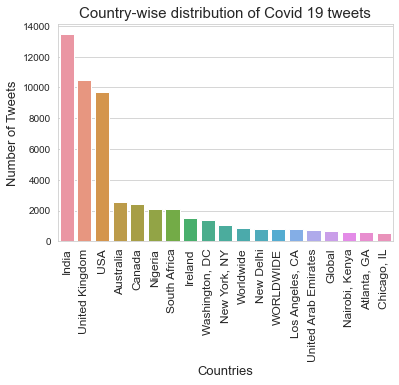

<Figure size 432x288 with 0 Axes>

In [210]:
sns.set_style('whitegrid')
sns.barplot(data=geog_data[1:20], x='location_new', y='text')
plt.xticks(rotation='vertical', fontsize=12)
plt.ylabel("Number of Tweets", fontsize=13)
plt.xlabel("Countries", fontsize=13)
plt.title("Country-wise distribution of Covid 19 tweets", fontsize=15)
plt.show()
plt.clf()

Highest number of tweets are from India, owing to it being second most populous country and the high number of cases being reported everyday. Similary Nigeria is the most populous country in Africa, and therefore has highest number of tweets as compared to other African countries. 
UK saw a new record of daily cases in August and there were doubts of a second wave of Coronavirus.

In [211]:
#from datetime stamp getting date, week, and day.

data['date']= pd.to_datetime(data['date'])
data['week']= data['date'].dt.week
data['day']= data['date'].dt.dayofweek
def weekday(x):
    if x<6:
        x='weekday'
    else:
        x='weekend'
    return x

data['date']=data['date'].dt.date

In [212]:
data.date.min(), data.date.max()

(datetime.date(2020, 7, 24), datetime.date(2020, 8, 30))

In [213]:
data.date.nunique()

26

Data is missing for some dates.

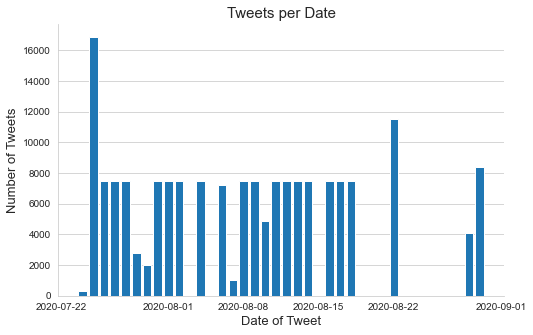

<Figure size 432x288 with 0 Axes>

In [214]:
#date-wise distribution of tweets
date1= data.groupby(['date'], as_index=False).text.count()

plt.figure(figsize=(8,5))
axes=plt.gca()
axes.xaxis.grid()
plt.bar(date1.date, date1.text)
sns.despine()
plt.xlabel('Date of Tweet', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.title('Tweets per Date', fontsize=15)
plt.show()
plt.clf()


Number of per day tweets are mostly uniform except for a few peaks.
High peak on 25July,2020 is because IPL Dates were announced that day. Being a big deal in India, it caused a raise in number of tweets. Also, weekends have higher number od tweets than weedays as shown below.

Empty gaps in the graph indicate missing data for those particular dates.

Text(0.5, 1.0, 'Graph indicating high number of tweets on weekend.')

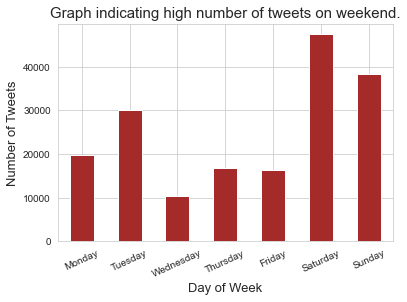

In [215]:
data.groupby('day')['text'].count().plot(kind='bar', color='brown')
plt.xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation= 25)
plt.xlabel("Day of Week", fontsize=13)
plt.ylabel("Number of Tweets", fontsize=13)
#sns.despine()
plt.title("Graph indicating high number of tweets on weekend.", fontsize=15)

I wanted to see if there has been a change in twitter usage due to lockdown and work from home. But clearly people are still tweeting more on Weekends instead of weekdays.

In [216]:
#analyzing tweets per user
len(data), data.user_name.nunique()

(179108, 92276)

In [217]:
num_tweets= data.groupby(['user_name']).text.count().reset_index().sort_values(by='text', ascending=False)
num_tweets= pd.merge(num_tweets, data[['user_name', 'user_followers', 'location_new']], on='user_name', how='left', copy=False)
num_tweets.rename(columns={'text': 'tweet_count'}, inplace=True)
num_tweets.drop_duplicates(subset='user_name', inplace=True)
num_tweets.head(30).style.hide_index()


user_name,tweet_count,user_followers,location_new
GlobalPandemic.NET,679,26108,WORLDWIDE
Coronavirus Updates,625,433,nan
covidnews.ch,402,352,Switzerland
Open Letters,390,17161,Text RESIST to 50409
Blood Donors India,282,1215920,India
Hindustan Times,280,7647627,India
IAM Platform,266,17815,Worldwide
Paperbirds_Coronavirus,259,141,nan
IANS Tweets,244,52155,New Delhi
ANI,233,4515177,India


As we can see above, the twitter handles with higher number of tweets belong to media channels or organization, and not a single peronnel. Some of them are particularly dedicated to Coronavirus and related updates.

As also seen in geographical distribution of tweets, a substantial number of accounts with high tweets are from India.

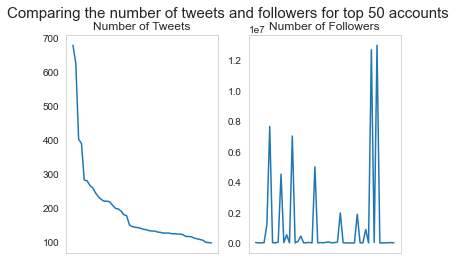

<Figure size 432x288 with 0 Axes>

In [218]:
plt.rcParams["axes.grid"] = False
plt.subplot(1,2,1)
plt.suptitle("Comparing the number of tweets and followers for top 50 accounts", fontsize=15)
plt.plot(num_tweets.user_name[:50], num_tweets.tweet_count[:50])
plt.title('Number of Tweets')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.subplot(1,2,2)
plt.plot(num_tweets.user_name[:50], num_tweets.user_followers[:50])
plt.title("Number of Followers")
frame2 = plt.gca()
frame2.axes.xaxis.set_ticklabels([])
plt.show()
plt.clf()

I suspected that accounts with higher number of tweets might have more followers but he number of followers seem to have no effect on tweeting activities of accounts.

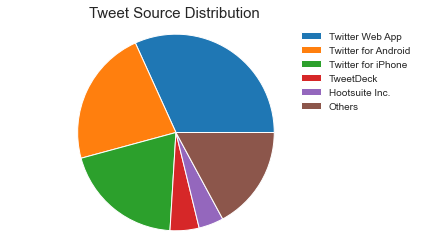

In [219]:
data_pie= data.groupby(['source']).text.count().reset_index().sort_values(by=['text'], ascending=False)
pie_5= data_pie.iloc[:5]
pie_others= pd.DataFrame(data={
    'source':'Others',
    'text': [data_pie.text[5:].sum()]
})
pie= pd.concat([pie_5, pie_others])

plt.pie(pie.text)
plt.axis('equal')
plt.title('Tweet Source Distribution', fontsize=15)
plt.legend(pie.source, bbox_to_anchor=(0.85, 1), facecolor='inherit', frameon=False)

I expected twitter for Ipad to be in top 5 sources but TweetDeck and HootSuite Inc. have comparatively more users.

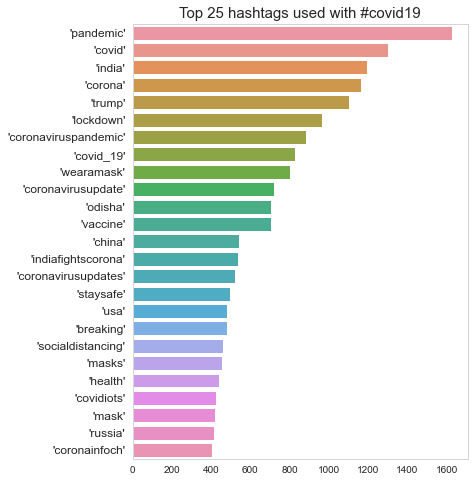

<Figure size 432x288 with 0 Axes>

In [220]:
data.hashtags= data.hashtags.astype('str')
hashtags={}
def list_hash(x):
    x= x.strip("[|]")
    x=x.lower()
    for i in x.split(', '):
        if i in hashtags:
            hashtags[i]+=1
        else:
            hashtags[i]=1
    return hashtags

hashh= data.hashtags.apply(list_hash)[0]
del hashh['nan']
#del hashh['covid19']
hashh= sorted(hashh.items(), key=lambda x: x[1], reverse=True)
hashtag=[]
count=[]
for a in hashh[2:27]:
    hashtag.append(a[0])
    count.append(a[1])

hashh[1:6], hashtag[:5],count[:5]

plt.figure(figsize=(6,8))
sns.barplot(y=hashtag, x=count, orient='h')
plt.yticks(fontsize=12)
plt.title("Top 25 hashtags used with #covid19", fontsize=15)
plt.show()
plt.clf()

I have removed #Covid19 and #Coronavirus from the list of hashtags because of their obviously high numbers. Having outliers interfered with representation of other hashtags.

--some of the other obvious hashtags used are #pandemic, #covid, #corona, #lockdown. 
--Masks also have various hashtags. 
--China is amongst the top hashtags because the virus spread from there. It did not appear in the top geographical areas for tweets related to covid19.
--Few other hashtags indicating countries are present.
--#trump is trending owing to his debatable statements.

Fun fact: if we go down till top 40 hashtags, we will find #trumpvirus.

# SentimentAnalysis

In [221]:
#creating a textblob object for sentiment analysis
def emo(x):
    ob= TextBlob(x)
    a= ob.sentiment
    return a
pol_sub= data.text.apply(emo)
pol_sub.head()

data['polarity']= pol_sub.apply(lambda x: x[0])
data['subjectivity']= pol_sub.apply(lambda x: x[1])

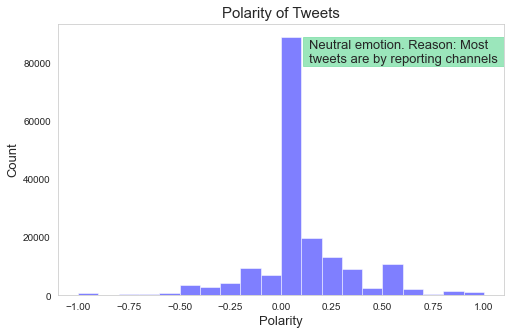

Average polarity: 0.08016086107626655


<Figure size 432x288 with 0 Axes>

In [222]:
num_bins = 20
plt.figure(figsize=(8,5))
n, bins, patches = plt.hist(data.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Polarity of Tweets', fontsize=15)
plt.text(0.14, 80000, 'Neutral emotion. Reason: Most \ntweets are by reporting channels', fontsize=13)
plt.axhspan(79000, 89000, xmin=0.55, xmax=1, color='#82E0AA', alpha=0.8)
plt.show()
plt.clf()
print('Average polarity:', data.polarity.mean())

Looking at the plot and the average, we can say that most of the tweets are neutral in emotion. It confirms the fact that high number of tweets were made by reporting channels. 
Looking at positive and negative tweets, positive ones are higher in number. Also, there are barely any tweets with strong positive or negative feelings.

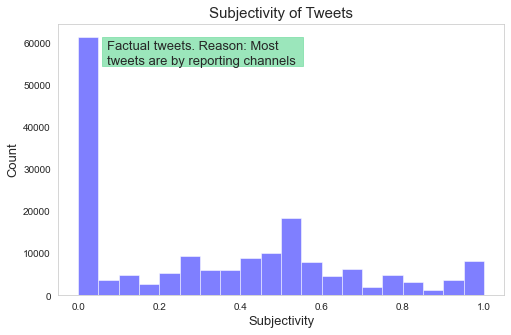

Average subjectivity: 0.32917085329077156


<Figure size 432x288 with 0 Axes>

In [240]:
num_bins = 20
plt.figure(figsize=(8,5))
n, bins, patches = plt.hist(data.subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Subjectivity of Tweets', fontsize=15)
plt.text(0.07, 55000, 'Factual tweets. Reason: Most \ntweets are by reporting channels', fontsize=13)
plt.axhspan(54500, 61500, xmin=0.1, xmax=0.55, color='#82E0AA', alpha=0.8)
plt.show()
plt.clf()

print('Average subjectivity:', data.subjectivity.mean())

High number of tweets with 0 subjectivity in the plot indicate that most tweets contained factual information. Once again, it correlates with our information about the type of user accounts with high activity.
Average subjectivity of 0.33 also indicates that tweets are fairly factual and not opinionated.

# Word Cloud

In [224]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string
from wordcloud import WordCloud

#lower case
data['text_process']= data['text'].apply(lambda x: x.lower())

#emoving numbers
data['text_process']= data['text_process'].apply(lambda x: re.sub(r'\d+', '', x))

#removing usernames and links
data['text_process']= data['text_process'].str.replace("@[\w]*|https.*", '')

#removing punctuations and whitespaces
data['text_process']= data['text_process'].str.replace('[^\w\s]','').str.strip()

#tokenization, lemmatization and stemming
stop_words = set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()
#stemmer= PorterStemmer()
def token(x):
    tokens = word_tokenize(x)
    result = [i for i in tokens if not i in stop_words or len(i)>3]
    result= [lemmatizer.lemmatize(i) for i in result]
    #result= [stemmer.stem(i) for i in result]
    return result

data['text_process']= data['text_process'].apply(token)

data['text_process'].head()

0    [smelled, scent, hand, sanitizers, today, someone, past, would, think, they, were, intoxicated, that]
1    [hey, wouldnt, have, made, more, sense, have, player, pay, their, respect]                           
2    [trump, never, once, claimed, covid, hoax, claim, that, this, effort]                                
3    [one, gift, covid, give, appreciation, simple, thing, that, were, always, around]                    
4    [july, medium, bulletin, novel, coronavirusupdates, covid]                                           
Name: text_process, dtype: object

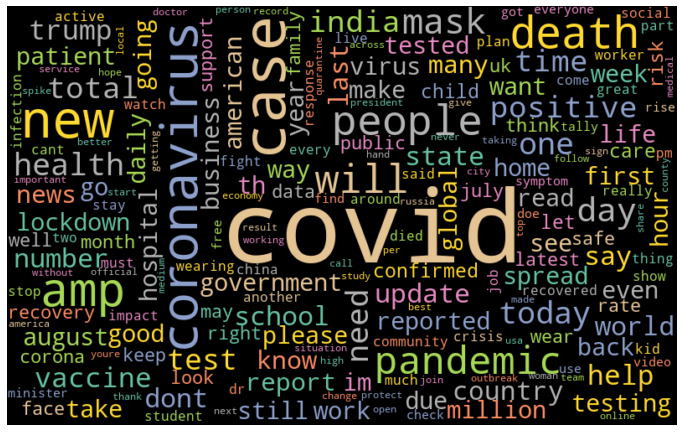

In [225]:
wordcloud = WordCloud(width=800, height=500, random_state=5, collocations=False, normalize_plurals=False, colormap='Set2',background_color='black', max_font_size=120, min_font_size=10).generate(data['text_process'].to_string())

plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

All the words in the above image again assert that most tweets were factual as there aren't any emotive words in it.

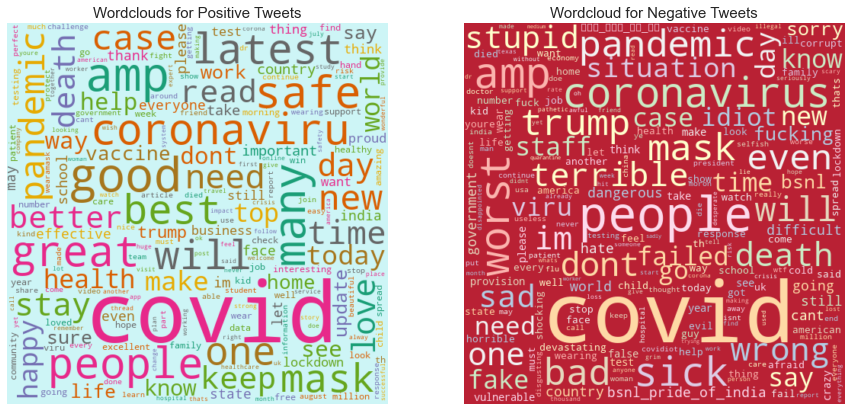

In [226]:
positive_words= data[data.polarity>0.4].text_process
wordcloud = WordCloud(width=800, height=500, random_state=1, collocations=False,colormap='Set2',background_color='black', max_font_size=110).generate(positive_words.to_string())

negative_words= data[data.polarity<-0.4].text_process
wordcloud = WordCloud(width=500, height=500, random_state=1, collocations=False,colormap='Set2',background_color='red', max_font_size=110).generate(negative_words.to_string())

f, ax= plt.subplots(1,2, figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Wordclouds for Positive Tweets", fontsize=15)
wordcloud = WordCloud(width=500, height=500, random_state=10, collocations=False, colormap='Dark2',background_color='#CDF5F6', max_font_size=110).generate(positive_words.to_string())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Wordcloud for Negative Tweets", fontsize=15)
wordcloud = WordCloud(width=500, height=500, random_state=10, collocations=False, colormap='Pastel1',background_color='#B92134', max_font_size=110).generate(negative_words.to_string())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

1. bsnl_pride_of_india, bsnl 
It appear in the red one because BSNL did not provide salary, PPE kits or health insurance to its employees during this period, which led to rage on twitter.

2. mask- 
It appears in both wordclouds. Reasor for postive: encouragement to wear mask. Negative: Protests in US regarding violation of Right to Breathe

3. Trump 
The word has been used more in negative tweets than positive ones, which again indicates that these tweeters are not happy with his statements or work.

4. death 
Reason for being in positive one could be because of declining number of daily deaths in US and many other countries.

# Similar Words

In [227]:
from collections import defaultdict  # For word frequency
import en_core_web_sm
import spacy  # For preprocessing
from gensim.models.phrases import Phrases, Phraser
import multiprocessing
from gensim.models import Word2Vec

In [228]:
nlp= en_core_web_sm.load(disable=['ner', 'parser'])

def cleaning(doc):
    # Lemmatizes and removes stopwords
    txt= [token.lemma_ for token in doc if not token.is_stop]
    #keeping tweets longer than 2 words
    if len(txt) > 2:
        return ' '.join(txt)

In [229]:
cleaning2= (re.sub("[^A-Za-z']+|http.*", ' ', str(row)).lower() for row in data['text'])
txt= [cleaning(doc) for doc in nlp.pipe(cleaning2, batch_size=5000, n_threads=-1)]

In [230]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(162026, 1)

In [231]:
p = [row.split() for row in df_clean['clean']]
phrases = Phrases(p, min_count=30, progress_per=10000)
bigram=Phraser(phrases)
sentences = bigram[p]

In [232]:
word = defaultdict(int)
for p in sentences:
    for i in p:
        word[i] += 1
len(word)

112550

In [233]:
sorted(word, key=word.get, reverse=True)[:10]

['covid',
 'coronavirus',
 'amp',
 'case',
 's',
 'people',
 'new',
 'pandemic',
 'death',
 'day']

In [234]:
cores = multiprocessing.cpu_count()

In [235]:
w2v_model = Word2Vec(min_count=20, window=5, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)

In [236]:
w2v_model.build_vocab(sentences, progress_per=10000)

In [237]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(20721561, 45165330)

In [238]:
w2v_model.init_sims(replace=True)

# Similarity Simulator

In [239]:
w2v_model.wv.most_similar(positive=["trump"])

[('realdonaldtrump', 0.7698380947113037),
 ('traitortrump', 0.6424949765205383),
 ('gop', 0.6400120854377747),
 ('potus', 0.6280667781829834),
 ('realjameswood', 0.6240576505661011),
 ('whitehouse_realdonaldtrump', 0.6238123774528503),
 ('votebluetosaveamerica', 0.620344340801239),
 ('trumpwarroom', 0.6112476587295532),
 ('donaldtrump', 0.6103115081787109),
 ('politicize', 0.609402596950531)]

Well the most similar words with 'Trump' explain the sentiments of people for him and his leadership.

## Try the similarity simulator for yourself. 
Assign the word (for which you want to find similar words) to the variable x. Ex: home, vaccine, 
Run the command (run the whole program first) 
Simple!

In [ ]:
x=''
w2v_model.wv.most_similar(positive=[x])